In [10]:
%matplotlib notebook
import numpy as np
from scipy.stats import norm
from scipy.stats import chi
from scipy.stats import uniform
from scipy.stats import rayleigh
import matplotlib.pyplot as plt

In [11]:
#Define a population probability distribution by combining multiple python's continuous distribution functions.
# Define three normal distributions: 
#         1. normal distribution with mu=0.5 and sigma=0.5^2 , 
#         2. a translation of length 3 to the right of a rayleigh continuous distribution with scale sqrt(2/pi) 
#          3. a uniform distribution in interval [9,10]
d1,d2,d3=norm(0,0.5),rayleigh(loc=3,scale=np.sqrt(2/np.pi)),uniform(9,1)
# We will consider the following distribution:
# draw from d1 with 30% probability, draw from d2 with 40% probability, and draw from d3 with 30% probability

In [12]:
#Show its theoretical average.
theo_ave=0.3*d1.mean()+0.4*d2.mean()+0.3*d3.mean()
print(f'The theoretical average is {theo_ave}')

The theoretical average is 4.45


In [13]:
#Generate a sample set with a sample size of your choice.
def Sampling(size):
    pool=uniform().rvs(size)
    samples=[]
    for value in pool:
        if value<0.3:
            samples.append(d1.rvs())
        elif value<0.7:
            samples.append(d2.rvs())
        else:
            samples.append(d3.rvs())
    return np.array(samples)
#Calculate sample average.
sampling_size=1000
samples=Sampling(sampling_size)
print(f'The average of a sample with {sampling_size} values is {samples.mean()}.')


The average of a sample with 1000 values is 4.541190630939034.


In [14]:
# Repeat generating resampling sets and calculate their sample average.

# The two remarks below in '''''' comes from https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
'''In machine learning, it is common to use a sample size that is the same as the original dataset.
if the dataset is enormous and computational efficiency is an issue, smaller samples can be used, 
such as 50% or 80% of the size of the dataset. '''
'''The number of repetitions must be large enough to ensure that meaningful statistics, 
such as the mean, standard deviation, and standard error can be calculated on the sample.
A minimum might be 20 or 30 repetitions. 
Smaller values can be used will further add variance to 
the statistics calculated on the sample of estimated values.
Ideally, the sample of estimates would be as large as possible given the time resources, 
with hundreds or thousands of repeats.

'''
# Caclulate the average of averages of the resampled sets.

# The following code is designed to avoid a for loop (since it is slow in python)
def bootstrap(data,size_resampling=1000,iterations=100):
    # The default value of replace for the function below is True, so this is sampling with replacement
    ensemble=np.random.choice(data,iterations*size_resampling,replace=True)
    # Now each row is a resampling with size_resampling times
    # And we have in total iterations rows.
    ensemble.resize(iterations,size_resampling)
    #Calculate the average of each resampled set
    ave=np.average(ensemble,axis=1)
    return ave

In [15]:
# Compare the average of averages and the original sample set's average with the theoretical average.
aves=bootstrap(samples)
print(f'The average of averages is {round(aves.mean(),3)}.')
print(f"The original sample set's average is {round(samples.mean(),3)}.")
print(f'The theoretical average is {theo_ave}.')
# Our real interest in using bootstrap (in this case) is to represent the variance of the original sample set's average 
# using the variance of the averages. So we print the variance of the averages
print(f'The variance of averages is {round(aves.var(),3)}.')
# We may assume the distribution of averages is normal, and the variance above would give us a confidence interval of the population's average

The average of averages is 4.542.
The original sample set's average is 4.541.
The theoretical average is 4.45.
The variance of averages is 0.017.


<IPython.core.display.Javascript object>


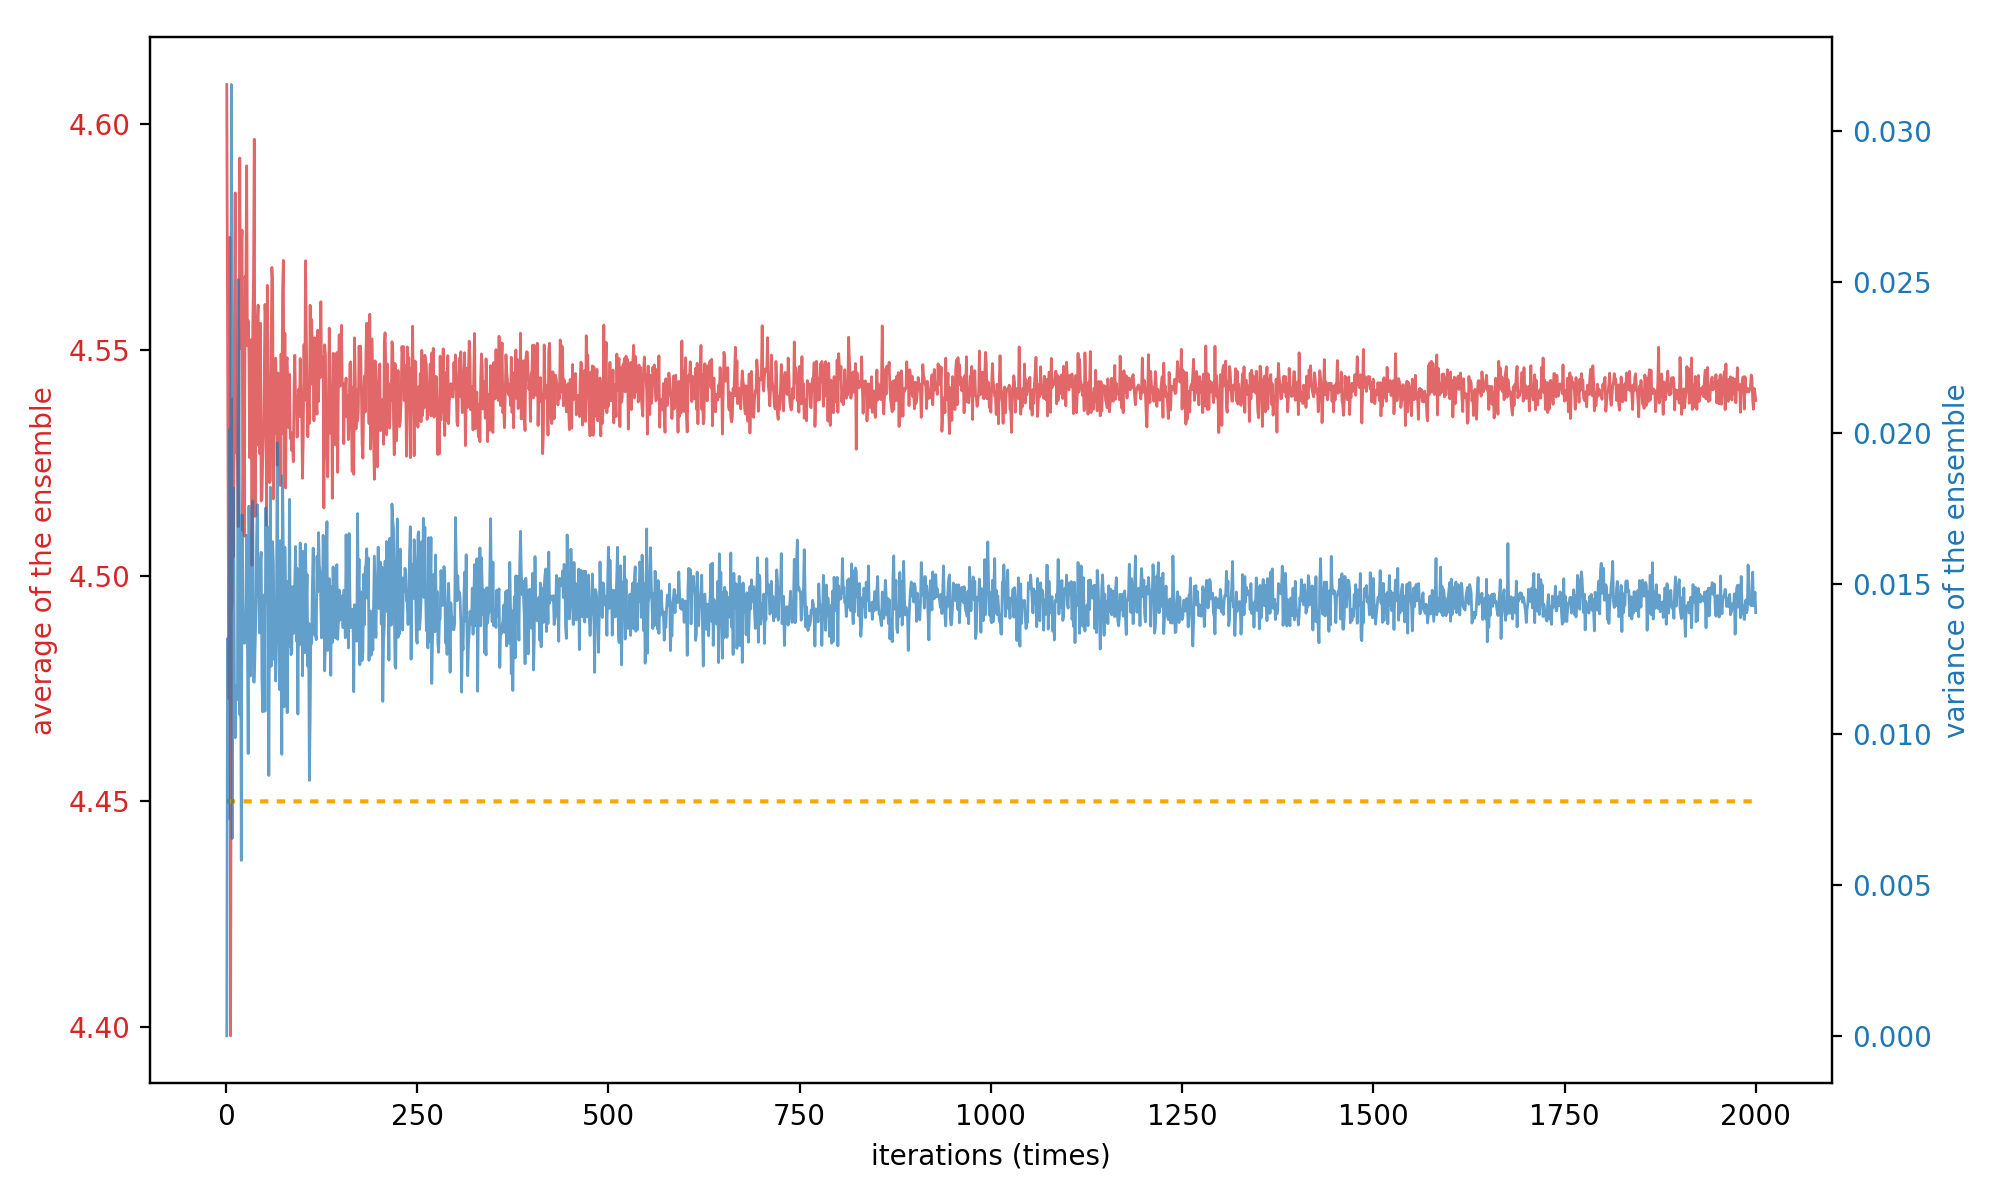

In [16]:
#Repeat the above procedure multiple times.
#Make a plot that describes the results readily understandable.
ave_vec=[]
var_vec=[]
Max_iter=2000
for i in range(0,Max_iter):
    aves=bootstrap(samples,iterations=i+1)
    ave_vec.append(aves.mean())
    var_vec.append(aves.var())
    
N = np.arange(1,Max_iter+1)
theo_ave_vec=np.array(Max_iter*[theo_ave])
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:red'
ax1.set_xlabel('iterations (times)')
ax1.set_ylabel('average of the ensemble', color=color)
ax1.plot(N, ave_vec, color=color,linewidth=1,alpha=0.7)
ax1.plot(N, theo_ave_vec, dashes=[2, 2],color='orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('variance of the ensemble', color=color)  # we already handled the x-label with ax1
ax2.plot(N, var_vec, color=color,linewidth=1,alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
# The orange dashed line is the theoretical average
# We see that both the average of the averages and the variance of the averages tend to stabilize as the number of iterations increase